## UCLA model trained on the UCLA dataset without visual attributes evaluation

In [1]:
import sys
sys.path.append("../../venv/lib/python3.6/site-packages/")
sys.path.append("..")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# file_name = "UCLA_model_UCLA_dataset_without_visual_attributes_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
file_name = 'UCLA_model_no_auxilliary_tasks_datalen-11646_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv'
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  2329  rows


In [4]:
preds

,imageHASH,name,violence,pred_violence
0,7630e8e8a2366464,test-01339.jpg,0.327242,0.429412
1,98d8cc2a30e4c2c2,train-23444.jpg,0.258162,0.297989
2,240d99f8e87b374c,train-21504.jpg,0.251423,0.235613
3,d69272662b3d7cb6,test-04018.jpg,0.355073,0.462716
4,9832a4e1f09abeac,train-14452.jpg,0.198123,0.400517
5,f5bd5c54db929692,train-28689.jpg,0.350241,0.401241
6,c9698b2b869e96ec,train-30511.jpg,0.311139,0.330061
7,4c7cf4946e62e4e0,train-12885.jpg,0.199193,0.204598
8,8d090d5d79b39296,test-06908.jpg,0.305317,0.271505
9,a5a785c7ced6cfc7,train-23820.jpg,0.277999,0.271160


### Protest

In [6]:
# au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.849, R_squared = 0.721 )')

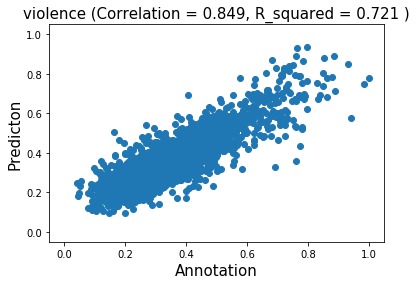

In [7]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
